# Week 6-2 영어 리뷰 단어 분포 살펴보기 Lab

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

os.chdir(r'C:\Users\Administrator\Downloads\6주차_11일차,12일차_자연어처리\Week6 자연어처리 Data')
review_df=pd.read_csv("smartthings_e_review.csv")

In [3]:
review_df

,date,star,like,comment
0,"September 19, 2021",1,15.0,Really unbelievable you can't even turn on a S...
1,"September 17, 2021",1,12.0,This app is so bad. It continually and randoml...
2,"September 17, 2021",2,11.0,I have this app on Android and iOS. It will no...
3,"September 15, 2021",2,15.0,Watch app does not sync current state status f...
4,"September 11, 2021",1,8.0,"Unable to add my hue lights, every function co..."
...,...,...,...,...
10955,"November 16, 2019",1,NaN,Wont connect to my Samsung tv. Using samsung p...
10956,"December 12, 2020",3,NaN,This is good but have one issue with 4D-pad wh...
10957,"December 14, 2019",1,NaN,"App crashes and stops. Removed, reinstall, try..."
10958,"January 17, 2019",1,NaN,since this smart things came in they took the ...


In [4]:
review_df.loc[0,"comment"].split(' ')

['Really',
 'unbelievable',
 'you',
 "can't",
 'even',
 'turn',
 'on',
 'a',
 'Samsung',
 'television',
 'with',
 'a',
 'Samsung',
 'phone.',
 'Absolutely',
 'not',
 'user',
 'friendly,',
 'by',
 'the',
 'time',
 'you',
 'figured',
 'it',
 'out',
 "you've",
 'forgot',
 'the',
 'next',
 'time.',
 'So',
 'glitchy,',
 'never',
 'holds',
 'settings,',
 'automation',
 "doesn't",
 'work',
 'correctly,',
 'does',
 'not',
 'interface',
 'as',
 'it',
 'says,',
 'not',
 'even',
 'with',
 'Bixby.',
 'If',
 '...\nFull',
 'Review']

In [5]:
word_counts = review_df['comment'].apply(lambda x:len(x.split(' ')))

In [6]:
word_counts.head()

0    52
1    55
2    63
3    59
4    61
Name: comment, dtype: int64

In [7]:
word_counts.describe()

count    10960.000000
mean        38.944252
std         16.346125
min          2.000000
25%         26.000000
50%         40.000000
75%         54.000000
max         73.000000
Name: comment, dtype: float64

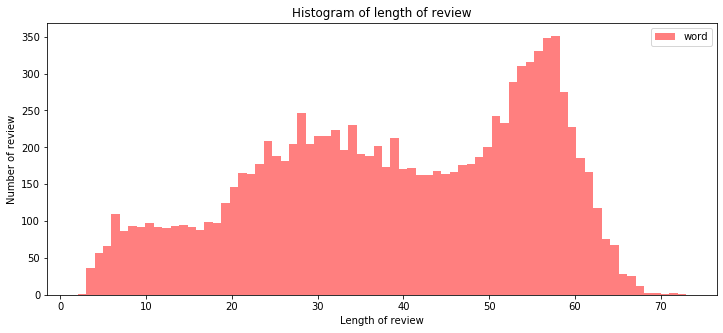

In [18]:
plt.figure(figsize=(12, 5))
plt.hist(word_counts, bins=72, alpha=0.5, color= 'r', label='word')
plt.legend()
# 그래프 제목
plt.title('Histogram of length of review')
# 그래프 x 축 라벨
plt.xlabel('Length of review')
# 그래프 y 축 라벨
plt.ylabel('Number of review')
plt.show()

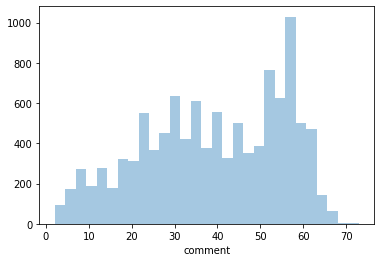

In [19]:
sns.distplot(word_counts,kde=False)

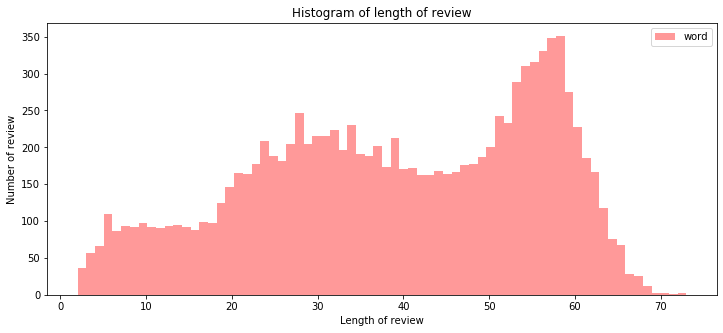

In [20]:
plt.figure(figsize=(12, 5))
ax = sns.distplot(word_counts,kde=False,bins=70,color='r')
ax.set_xlabel('Length of review')
ax.set_ylabel('Number of review')
ax.set_title('Histogram of length of review')
ax.legend(labels=['word'])
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x25894d46988>,
 'caps': [<matplotlib.lines.Line2D at 0x25894c5d9c8>,
 'boxes': [<matplotlib.lines.Line2D at 0x25897c34508>],
 'medians': [<matplotlib.lines.Line2D at 0x25894c5a708>],
 'fliers': [<matplotlib.lines.Line2D at 0x25894c54848>],
 'means': [<matplotlib.lines.Line2D at 0x25894c5a948>]}

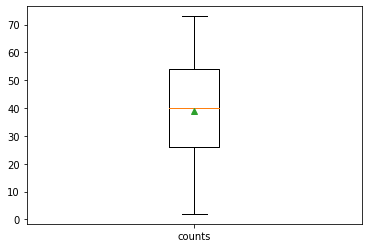

In [21]:
plt.boxplot(word_counts,
             labels=['counts'],
             showmeans=True)

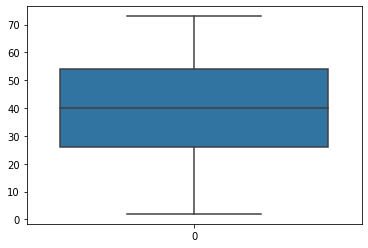

In [22]:
sns.boxplot(data=word_counts)

In [23]:
print(review_df.loc[0,"comment"])
print(review_df.loc[1,"comment"])

Really unbelievable you can't even turn on a Samsung television with a Samsung phone. Absolutely not user friendly, by the time you figured it out you've forgot the next time. So glitchy, never holds settings, automation doesn't work correctly, does not interface as it says, not even with Bixby. If ...
Full Review
This app is so bad. It continually and randomly transfers the audio output to my bluetooth headset. Unless I keep checking the app for the current location of the audio output, I almost always miss my calls and messages because the phone doesn't ring, it just beeps on the bluetooth headset that is s...
Full Review


In [24]:
' '.join(review_df.loc[:1,"comment"])

"Really unbelievable you can't even turn on a Samsung television with a Samsung phone. Absolutely not user friendly, by the time you figured it out you've forgot the next time. So glitchy, never holds settings, automation doesn't work correctly, does not interface as it says, not even with Bixby. If ...\nFull Review This app is so bad. It continually and randomly transfers the audio output to my bluetooth headset. Unless I keep checking the app for the current location of the audio output, I almost always miss my calls and messages because the phone doesn't ring, it just beeps on the bluetooth headset that is s...\nFull Review"

(-0.5, 799.5, 599.5, -0.5)

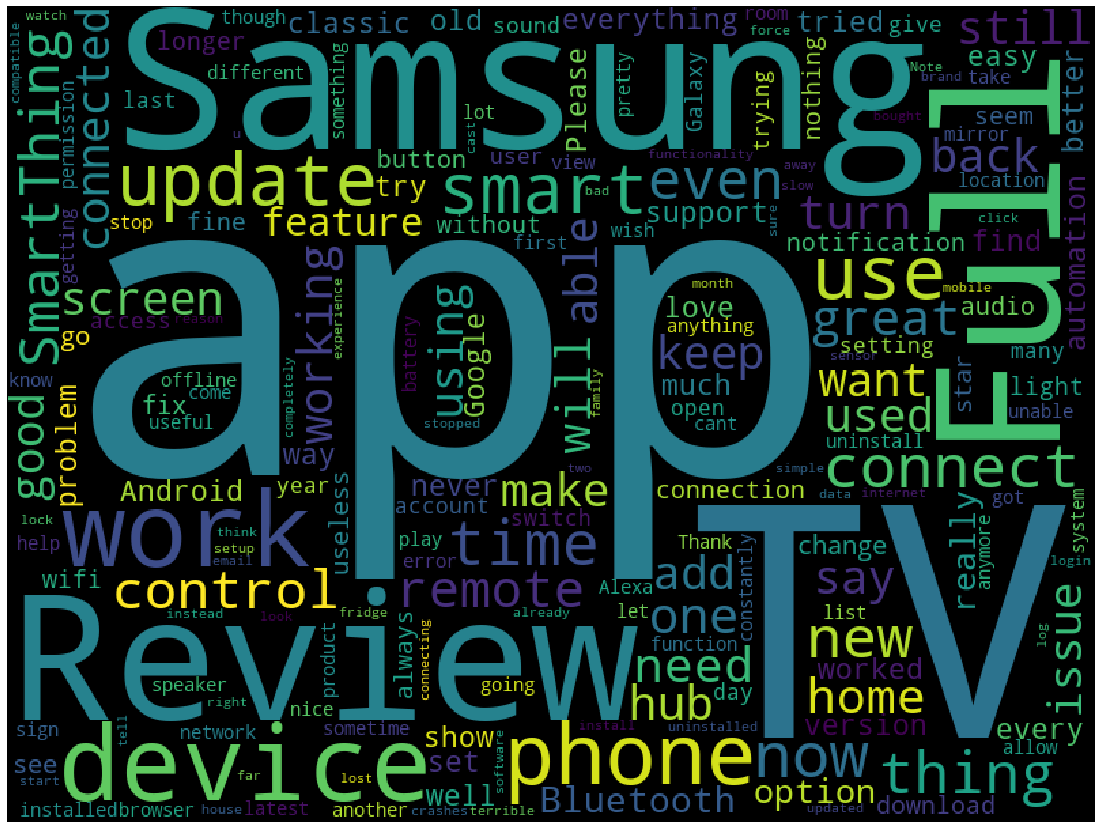

In [28]:
from wordcloud import WordCloud
cloud = WordCloud(width=800, height=600, collocations = False).generate(" ".join(review_df['comment']))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')

1    5556
2    1139
3    1012
4    1249
5    2004
Name: star, dtype: int64


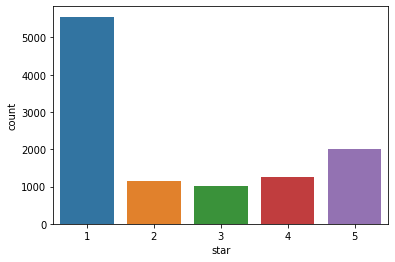

In [16]:
print(review_df['star'].value_counts().sort_index())
sns.countplot(review_df['star'],order=review_df['star'].value_counts().sort_index().index)

In [17]:
review_df['star'].mean()

2.361861313868613

1. 삼성 smartthings에 대한 영문 리뷰 파일을 열어서 review_df에 저장하시오.

2. comment 컬럼의 단어 수를 저장하는 시리즈 word_counts를 만드시오.

3. word_counts를 사용하여 단어수의 분포를 확인하시오.

4. 단어 분포에 대한 히스토그램을 그리시오(matplotlib 이용).

5. 단어 분포에 대한 히스토그램을 그리시오(seaborn 이용).

6. 박스 플롯을 matplotlib, seaborn 두 가지 패키지를 이용해서 그리시오.

7. 워드 클라우드를 그리시오.

8. 평점의 분포를 그리시오.